Plotting x and y

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import pandas as pd
import math
import statistics
from sklearn.linear_model import LinearRegression

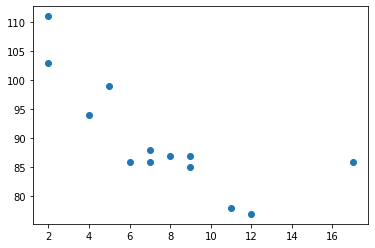

In [ ]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
plt.scatter(x, y)
plt.show()

Pearson Correlation

In [ ]:
x = [96.9,73.1,83.1,86.5,64.1,118.8,71.3,122.7]
y = [107.8,97.2,95.1,112.0,78.0,112.0,95.0,118.0]

correlation, p_value = stats.pearsonr(x, y)
print("r/correlation: ",correlation)
print("p_val: ", p_value)

# dg pake alfa lihat di tabel 11 A26 hal 688 picturing
criticalVal = float(input("critical val: "))
print(f'corr: {abs(correlation)} and critical value:{criticalVal}')
if abs(correlation) > criticalVal:
  print("corr is significant")
else:
  print("coor is NOT significant")

r/correlation:  0.8567170256532357
p_val:  0.0065863716530480555
critical val: 0.707
corr: 0.8567170256532357 and critical value:0.707
corr is significant


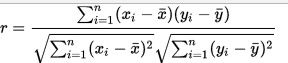

In [ ]:
def mean(someList):
    total = 0
    for a in someList:
        total += float(a)
    mean = total/len(someList)
    return mean
def standDev(someList):
    listMean = mean(someList)
    dev = 0.0
    for i in range(len(someList)):
        dev += (someList[i]-listMean)**2
    dev = dev**(1/2.0)
    return dev
def correlCo(someList1, someList2):

    # First establish the means and standard deviations for both lists.
    xMean = mean(someList1)
    yMean = mean(someList2)
    xStandDev = standDev(someList1)
    yStandDev = standDev(someList2)
    # r numerator
    rNum = 0.0
    for i in range(len(someList1)):
        rNum += (someList1[i]-xMean)*(someList2[i]-yMean)

    # r denominator
    rDen = xStandDev * yStandDev
    r =  rNum/rDen
    return r

print(correlCo([5,7,8,7,2,17,2,9,4,11,12,9,6], [99,86,87,88,111,86,103,87,94,78,77,85,86]))

-0.7585915243761551



*   Left Tail

H0 >= 0 (no signif -)

Ha < 0 (signi -)

*   Right Tail

H0 <= 0 (no signif +)

Ha > 0 (signi +)

*   Two Tail Tail

H0 = 0 (no signif)

Ha != 0 (signi)

t-test (standardized test statistic)

In [ ]:
x = [1.8,1.3,2.4,1.5,3.9,2.1,0.9,1.4,3.0,4.6]
y = [604.4,434.2,544.0,370.4,742.3,340.5,232.0,262.3,441.9,1157.7]

state = str(input("state(boleh kosong): "))
alfa = float(input("alfa=")) # Input lgsg kalo bukan two-tailed test
n = len(x)
print('n: ',n)
df = n-2
tail = str(input("left/right/two: "))
if tail == 'two':
  tc_kiri = stats.t.ppf((alfa/2),df) # Daerah Penolakan / t-Score
  tc_kanan = stats.t.ppf((1-(alfa/2)),df)
  print(f"Tc kiri={tc_kiri}")
  print(f"Tc kanan={tc_kanan}")
elif tail =='left':
  tc = stats.t.ppf(alfa,df)
elif tail =='right':
  tc = stats.t.ppf((1-alfa),df)  
t = correlation / math.sqrt((1-correlation**2)/(n-2))
print('t= ',t)
correlation, p_value = stats.pearsonr(x, y)
print('r/corr: ',correlation)
if tail == 'left':
  if t > tc:
    print('terima h0')
  else:
    print('tolak h0')
elif tail == 'two':
  if t > tc_kiri and t < tc_kanan:
    print('terima h0')
  else:
    print('tolak h0')
elif tail == 'right':
  if t < tc:
    print('terima h0')
  else:
    print('tolak ho')

state(boleh kosong): -
alfa=0.05
n:  10
left/right/two: two
Tc kiri=-2.306004135033371
Tc kanan=2.3060041350333704
r/corr:  0.8736336962866011
t=  5.078276982065964
tolak h0


Regression Lines

gradient (m) -7.884805863708402
intercept (b) 1396.7714936608559
X_bar: 69 Y_bar: 848.2142857142857


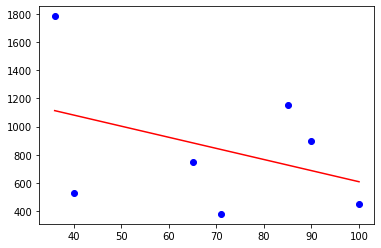

prediksi:  805.4110538827257


In [ ]:
x = np.array([36,71,100,40,65,90,85])
y = np.array([1782.5,380,450,525,750,900,1150])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
print("gradient (m)",gradient)
print("intercept (b)",intercept)
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')

avgX = statistics.mean(x)
avgY = statistics.mean(y)
print(f'X_bar: {avgX} Y_bar: {avgY}') #rata" nya harusnya bertepatan dengan garis yg tercipta

plt.show()
# y1 = y topi
# Latihan di halaman 513
# gradient*angka+intercept , angkanya diketahui di soal
print("prediksi: ",gradient*75+intercept)

In [ ]:
x = np.array([36,71,100,40,65,90,85])
y = np.array([1782.5,380,450,525,750,900,1150])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-7.88480586]]
[1396.77149366]


Finding the Standard Error of Estimate

In [ ]:
x = np.array([36,71,100,40,65,90,85])
y = np.array([1782.5,380,450,525,750,900,1150])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
print("gradient (m)",gradient)
print("intercept (b)",intercept)
y_topi = gradient * x + intercept 
y_minus_y_topi_sqr = (y-y_topi)**2

print("unexplained variation: ",end="")
unexpl = sum(y_minus_y_topi_sqr)
print(unexpl)

n = len(x)
se = math.sqrt(unexpl/(n-2))
print("se: ",se)

gradient (m) -7.884805863708402
intercept (b) 1396.7714936608559
unexplained variation: 1234391.0818641048
se:  496.868409513848


In [ ]:
# y topi
y=-7.884805863708402*95 + 1396.7714936608559
y

647.7149366085577

Constructing a Prediction Interval

In [ ]:
x = np.array([1.8,1.3,2.4,1.5,3.9,2.1,0.9,1.4,3.0,4.6])
y = np.array([604.4,434.2,544.0,370.4,742.3,340.5,232.0,262.3,441.9,1157.7])
n = len(x)
df = n-2

levConf = float(input("c= "))
alpha = 1-levConf
tc = stats.t.ppf(1-(alpha/2),df)
print("tc: ",tc)

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
print("gradient (m)",gradient)
print("intercept (b)",intercept)
y_topi = gradient * x + intercept 
y_minus_y_topi_sqr = (y-y_topi)**2

print("unexplained variation: ",end="")
unexpl = sum(y_minus_y_topi_sqr)
print(unexpl)

n = len(x)
se = math.sqrt(unexpl/(n-2))
print("se: ",se)

x_bar = statistics.mean(x)
print("x bar: ",x_bar)

x_sqr = x**2
print("sum x_sqr: ",sum(x_sqr))

x_sum = np.sum(x)
print("x_sum: ",x_sum)

x0 = float(input("x0: "))
atas = (n * ((x0 - x_bar)**2))
bawah = ( ( n * (sum(x_sqr)) ) - ((x_sum)**2) )
E = tc * se * math.sqrt( 1 + 1/n + (atas/bawah))

print("E: ", E)
print(f'y topi: {gradient*x0+intercept}')
print(f'y topi - E: {gradient*x0+intercept-E} dan y topi + E: {gradient*x0+intercept+E}')

c= 0.9
tc:  1.8595480375228424
gradient (m) 199.53460035251746
intercept (b) 56.03576519273503
unexplained variation: 161165.05462794082
se:  141.93530860392914
x bar:  2.29
sum x_sqr:  65.49000000000001
x_sum:  22.9
x0: 2.8
E:  279.31469455416266
y topi: 614.7326461797838
y topi - E: 335.4179516256212 dan y topi + E: 894.0473407339465
